# Semi Structured Data project

project goals
1. process one colleciton of data and summarize information form a number of fields
2. Program should contain JSON structures and store in a mongodb
3. 

Program Description : collect data from Twitter and return a JSON file

Data Source twitter.com

Question : What is the sentiment of certain hashtags on twitter?


In [9]:
import tweepy 
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json


#Use your keys
# Consume:
CONSUMER_KEY    = 'Z7swXxO5KISDASwxiJmoHXQnX'
CONSUMER_SECRET = 'VDBJKxoY3MCb7s5YbIl5lTk4HSgayQYIbVxRQ81iGtgD6MdyZq'

# Access:
ACCESS_TOKEN  = '418036639-PTleI12U9lBDsPDCdiJFjSYqhBkyskGjEScalAzA'
ACCESS_SECRET = 'DAkPHeIJbZ2vyNzGxY9JnoVPhcXoOjOw0o0pO7mItM6vP'

# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()


Number of tweets extracted: 200.

5 recent tweets:

https://t.co/tUDYZrc6w0

RT @realDonaldTrump: #SOTU
https://t.co/kL6SoClx4K

#SOTU
https://t.co/kL6SoClx4K

Looking forward to tonight! #SOTU https://t.co/lGKkZeaxUZ

Melania and I send our greetings to those celebrating the Lunar New Year. Today, people across the United States an… https://t.co/YVDWyIJVir



In [10]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,https://t.co/tUDYZrc6w0
1,RT @realDonaldTrump: #SOTU\nhttps://t.co/kL6So...
2,#SOTU\nhttps://t.co/kL6SoClx4K
3,Looking forward to tonight! #SOTU https://t.co...
4,Melania and I send our greetings to those cele...
5,I see Schumer is already criticizing my State ...
6,Tremendous numbers of people are coming up thr...
7,"I am pleased to announce that David Bernhardt,..."
8,With Caravans marching through Mexico and towa...
9,Everyone is asking how Tiger played yesterday....


In [12]:
#Export to pandas 
Export = data.to_json(r'C:\\Users\\User\\Desktop\\Export_Tweets')

In [ ]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

In [13]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1093271658977218560
2019-02-06 22:14:10
Twitter for iPhone
99344
22768
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1093271654422269952, 'id_str': '1093271654422269952', 'indices': [0, 23], 'media_url': 'http://pbs.twimg.com/media/DywUxvzX0AA5Uqk.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DywUxvzX0AA5Uqk.jpg', 'url': 'https://t.co/tUDYZrc6w0', 'display_url': 'pic.twitter.com/tUDYZrc6w0', 'expanded_url': 'https://twitter.com/realDonaldTrump/status/1093271658977218560/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 680, 'h': 383, 'resize': 'fit'}, 'large': {'w': 1280, 'h': 720, 'resize': 'fit'}, 'medium': {'w': 1200, 'h': 675, 'resize': 'fit'}}}]}


In [14]:
# only Relavant Factors to analyze Tweets
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [15]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,https://t.co/tUDYZrc6w0,23,1093271658977218560,2019-02-06 22:14:10,Twitter for iPhone,99344,22768
1,RT @realDonaldTrump: #SOTU\nhttps://t.co/kL6So...,50,1093201175455911939,2019-02-06 17:34:05,Twitter for iPhone,0,26061
2,#SOTU\nhttps://t.co/kL6SoClx4K,29,1092991438579732482,2019-02-06 03:40:40,Twitter for iPhone,124732,26061
3,Looking forward to tonight! #SOTU https://t.co...,57,1092901071910043648,2019-02-05 21:41:35,Twitter for iPhone,81332,17325
4,Melania and I send our greetings to those cele...,140,1092832363913072644,2019-02-05 17:08:34,Twitter for iPhone,80473,14875
5,I see Schumer is already criticizing my State ...,140,1092807525102247938,2019-02-05 15:29:52,Twitter for iPhone,140838,28909
6,Tremendous numbers of people are coming up thr...,140,1092787440560078849,2019-02-05 14:10:03,Twitter for iPhone,132800,30447
7,"I am pleased to announce that David Bernhardt,...",139,1092516540262551553,2019-02-04 20:13:35,Twitter for iPhone,110401,19999
8,With Caravans marching through Mexico and towa...,140,1092181733825490945,2019-02-03 22:03:11,Twitter for iPhone,139418,34561
9,Everyone is asking how Tiger played yesterday....,144,1092169520469471233,2019-02-03 21:14:39,Twitter for iPhone,151641,24446


In [16]:
# Tweet Statistics and Summary
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 121.045


In [17]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Numerous states introducing Bible Literacy classes, giving students the option of studying the Bible. Starting to make a turn back? Great!
Number of likes: 256205
138 characters.

The tweet with more retweets is: 
The citizens of Venezuela have suffered for too long at the hands of the illegitimate Maduro regime. Today, I have… https://t.co/6pcpLqVzaQ
Number of retweets: 81200
139 characters.



In [ ]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

1093271658977218560
2019-02-06 22:14:10
Twitter for iPhone
99344
22768
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1093271654422269952, 'id_str': '1093271654422269952', 'indices': [0, 23], 'media_url': 'http://pbs.twimg.com/media/DywUxvzX0AA5Uqk.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DywUxvzX0AA5Uqk.jpg', 'url': 'https://t.co/tUDYZrc6w0', 'display_url': 'pic.twitter.com/tUDYZrc6w0', 'expanded_url': 'https://twitter.com/realDonaldTrump/status/1093271658977218560/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 680, 'h': 383, 'resize': 'fit'}, 'large': {'w': 1280, 'h': 720, 'resize': 'fit'}, 'medium': {'w': 1200, 'h': 675, 'resize': 'fit'}}}]}


In [19]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

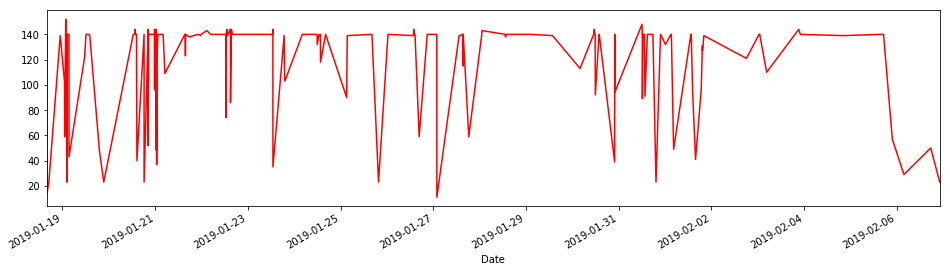

In [20]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

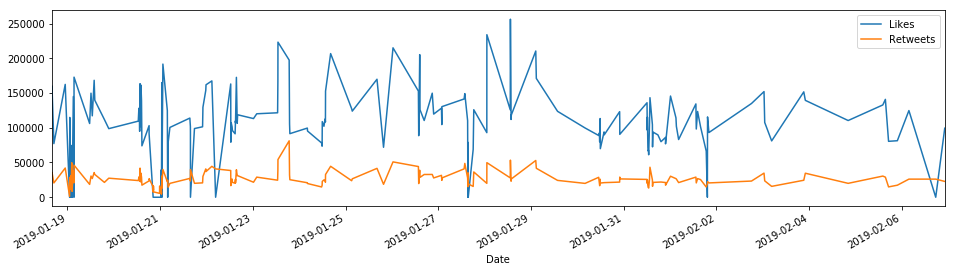

In [21]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [22]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone


In [39]:
text = data['Tweets']
text.head()

0                              https://t.co/tUDYZrc6w0
1    RT @realDonaldTrump: #SOTU\nhttps://t.co/kL6So...
2                       #SOTU\nhttps://t.co/kL6SoClx4K
3    Looking forward to tonight! #SOTU https://t.co...
4    Melania and I send our greetings to those cele...
Name: Tweets, dtype: object

In [41]:
def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [43]:
text.head()

0                              https://t.co/tUDYZrc6w0
1    RT @realDonaldTrump: #SOTU\nhttps://t.co/kL6So...
2                       #SOTU\nhttps://t.co/kL6SoClx4K
3    Looking forward to tonight! #SOTU https://t.co...
4    Melania and I send our greetings to those cele...
Name: Tweets, dtype: object

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import re
from twython import Twython
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

In [48]:
#Create a string form of our list of text
raw_string = ''.join(text)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

In [49]:
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS]

In [51]:
wc = WordCloud(background_color="white", max_words=2000)
clean_string = ','.join(words)
wc.generate(clean_string)

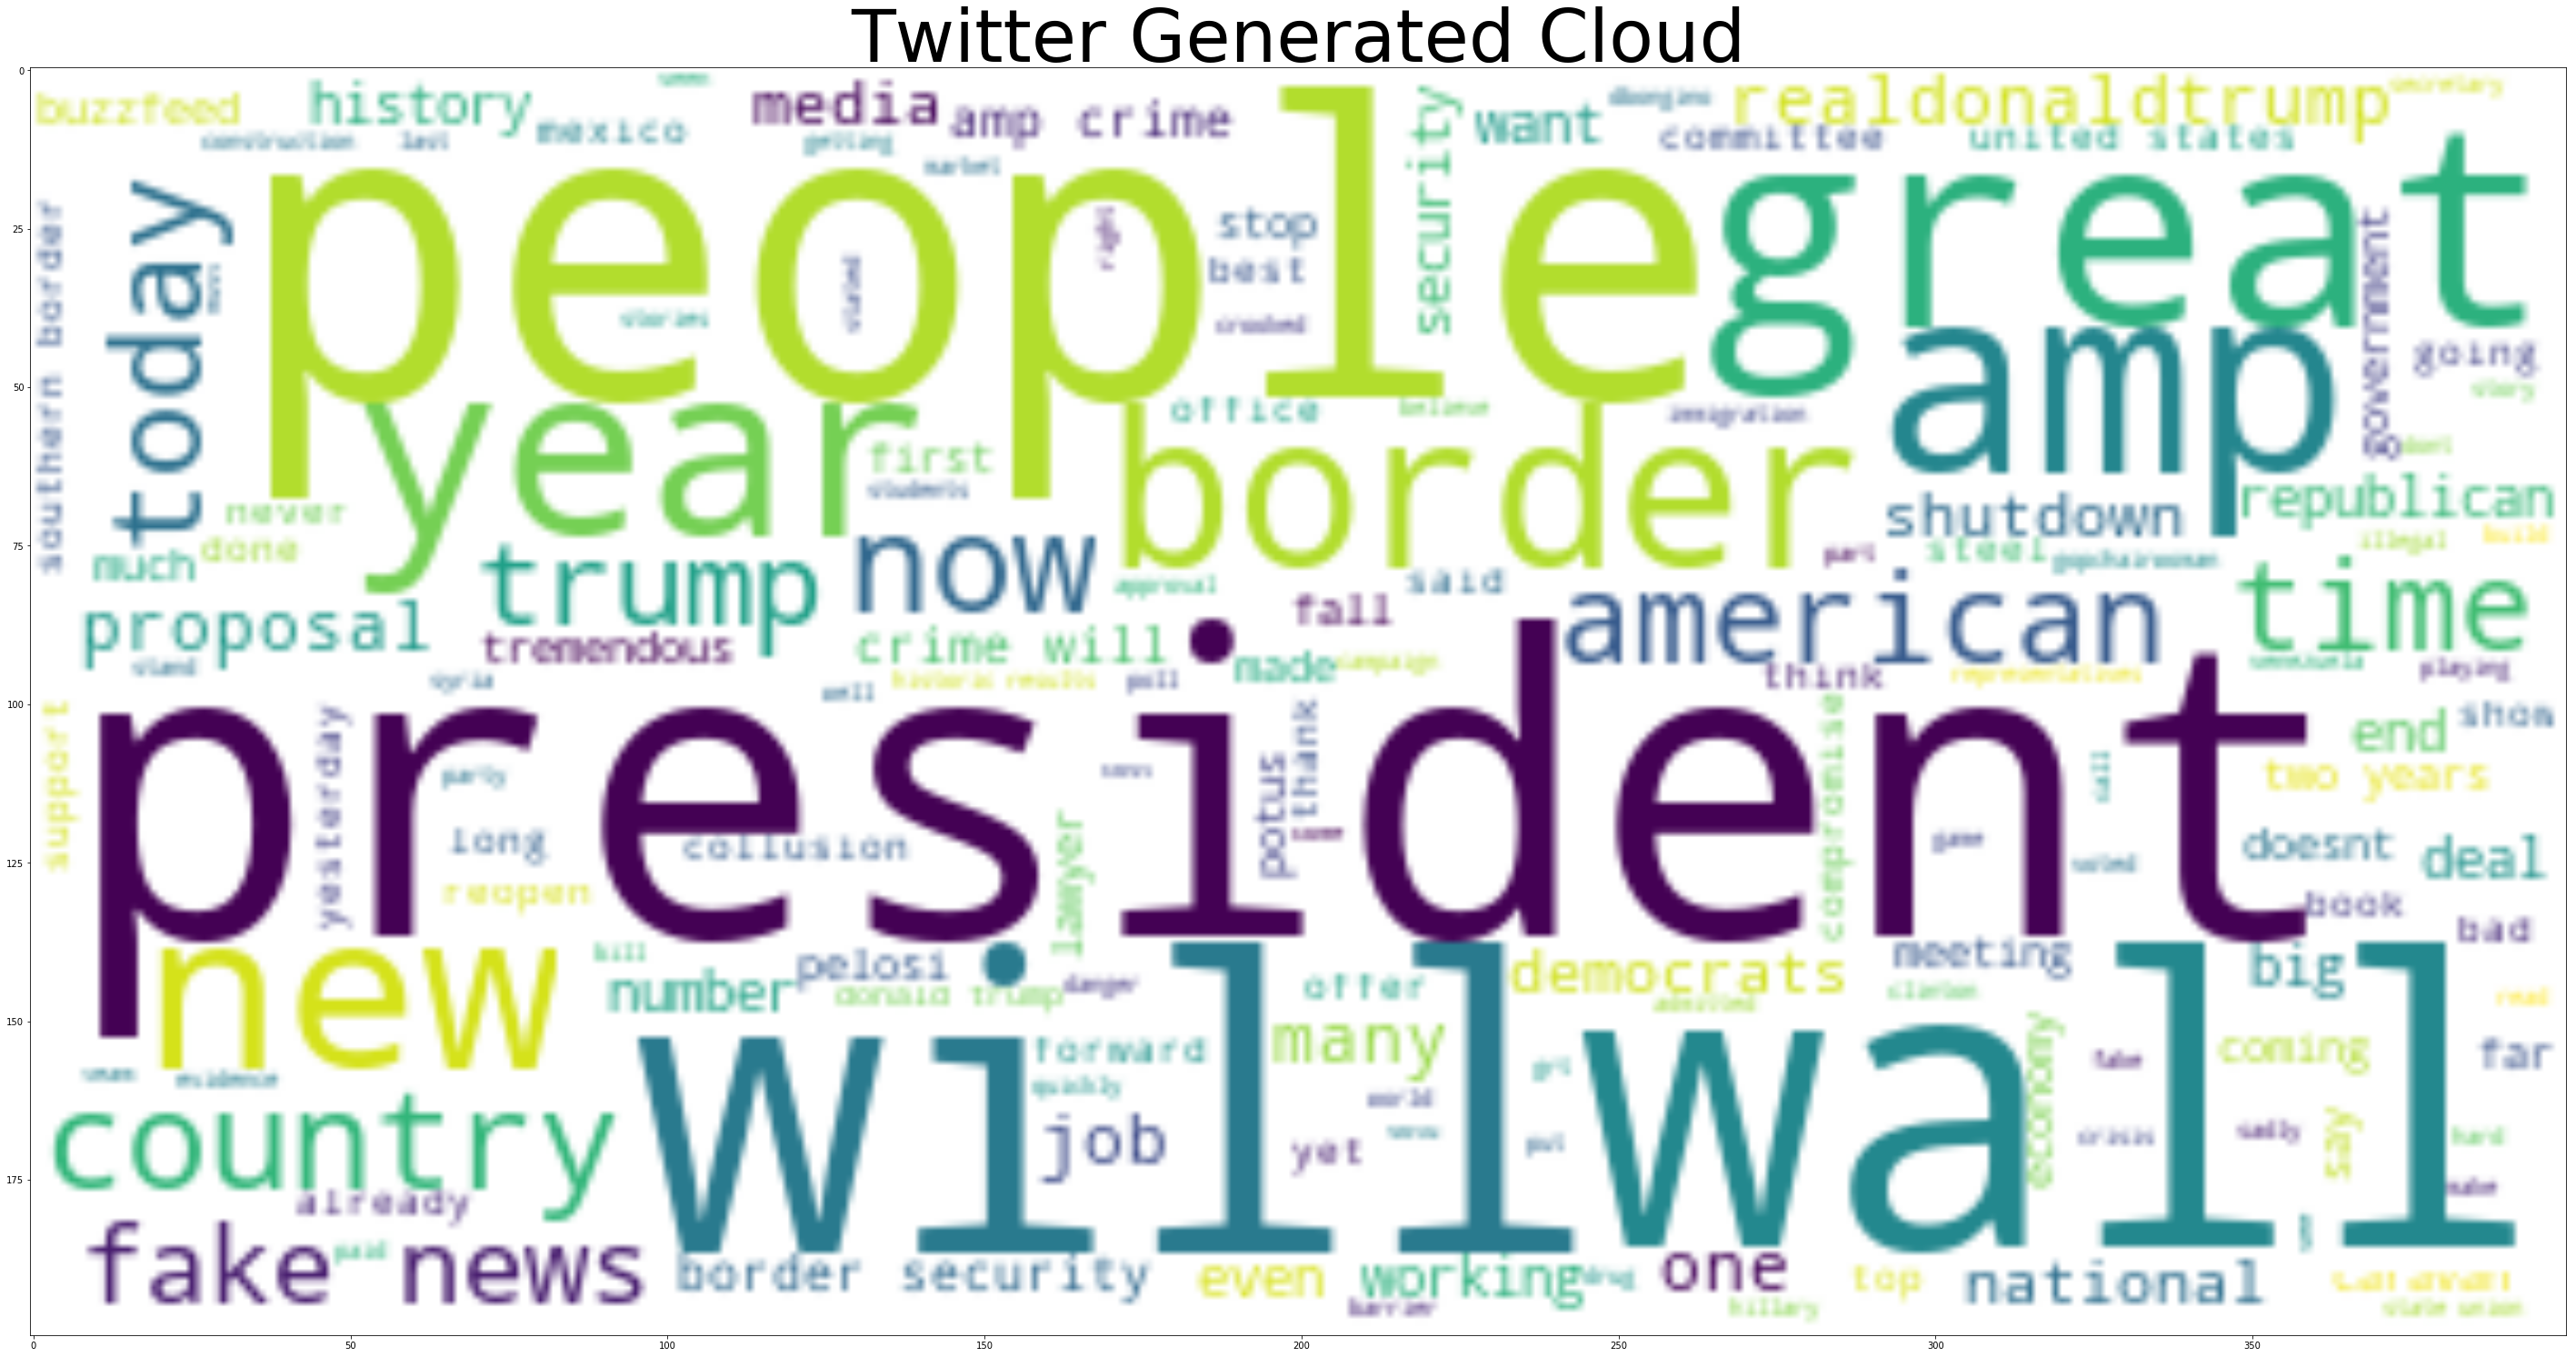

In [56]:
f = plt.figure(figsize=(50,50))
plt.title('Original Stencil', size=40)
plt.imshow(wc, interpolation='bilinear')
plt.title('Twitter Generated Cloud', size=80)
plt.show()

# Sentiment Analysis

In [58]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [59]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,https://t.co/tUDYZrc6w0,23,1093271658977218560,2019-02-06 22:14:10,Twitter for iPhone,99344,22768,0
1,RT @realDonaldTrump: #SOTU\nhttps://t.co/kL6So...,50,1093201175455911939,2019-02-06 17:34:05,Twitter for iPhone,0,26061,0
2,#SOTU\nhttps://t.co/kL6SoClx4K,29,1092991438579732482,2019-02-06 03:40:40,Twitter for iPhone,124732,26061,0
3,Looking forward to tonight! #SOTU https://t.co...,57,1092901071910043648,2019-02-05 21:41:35,Twitter for iPhone,81332,17325,0
4,Melania and I send our greetings to those cele...,140,1092832363913072644,2019-02-05 17:08:34,Twitter for iPhone,80473,14875,1
5,I see Schumer is already criticizing my State ...,140,1092807525102247938,2019-02-05 15:29:52,Twitter for iPhone,140838,28909,0
6,Tremendous numbers of people are coming up thr...,140,1092787440560078849,2019-02-05 14:10:03,Twitter for iPhone,132800,30447,1
7,"I am pleased to announce that David Bernhardt,...",139,1092516540262551553,2019-02-04 20:13:35,Twitter for iPhone,110401,19999,1
8,With Caravans marching through Mexico and towa...,140,1092181733825490945,2019-02-03 22:03:11,Twitter for iPhone,139418,34561,0
9,Everyone is asking how Tiger played yesterday....,144,1092169520469471233,2019-02-03 21:14:39,Twitter for iPhone,151641,24446,1


In [60]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [61]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 50.0%
Percentage of neutral tweets: 32.0%
Percentage de negative tweets: 18.0%


# Convert to JSON

In [ ]:
jsondf = df.to_json( orient='index')
jsondf

In [ ]:
import json
json.loads(jsondf)

In [ ]:
df.transpose

In [ ]:
jsondf = df.to_json( orient='values')

In [ ]:
# Load the first sheet of the JSON file into a data frame
df = pd.read_json(url, orient='columns')

# View the first ten rows
df.head(10)